## Trabalho T2 sobre Sistemas Lineares

### Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2023

**Nome dos componentes do grupo:** Pedro Henrique Warken Ramos

**Questão 1:**
Resolva o seguinte sistema $Ax=b$ usando decomposição LU mostrando as matrizes triangulares L e U.

$$ \begin{cases}
	         6.1x_1 + 0.23x_2 + 1.3x_3 +1.2x_4 + 0.11x_5 = 19.52\\
	         0.28x_1  + 8.18x_2  + 1.01x_3 +3x_4 + 3.12x_5= 83.15\\
	         0.5x_1 + 1.78x_2 + 15.2x_3 + 4.2x_4 +8.1x_5= -22.14\\
	         4.2x_1 + 5.3x_2 + 1.8x_3 +29.0x_4 +7.51x_5 = -27.28\\
	         0.2x_1 + 1.9x_2 + 4.86x_3 +4.3x_4 +20.1x_5  = 21.87
	         \end{cases} $$

Então, resolva esse mesmo sistema usando eliminação de Gauss, e compare os coeficientes da matriz do sistema triangular obtido com a matriz U. Comente o que você observou.

In [ ]:
import numpy as np

A = np.array([[6.1, 0.23, 1.3, 1.2, 0.11],
     [0.28, 8.18, 1.01, 3, 3.12],
     [0.5, 1.78, 15.2, 4.2, 8.1],
     [4.2, 5.3, 1.8, 29, 7.51],
     [0.2, 1.9, 4.86, 4.3, 20.1]])

b = np.array([19.52, 83.15, -22.14, -27.28, -21.87])

def lu_decomposition(matrix):
    n = len(matrix)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        L[i, i] = 1

        for j in range(i, n):
            U[i, j] = matrix[i, j] - sum(L[i, k] * U[k, j] for k in range(i))

        for j in range(i + 1, n):
            L[j, i] = (matrix[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

    return L, U

def solve_lu(matrix, b):
    L, U = lu_decomposition(matrix)
    n = len(matrix)

    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - sum(L[i, j] * y[j] for j in range(i))

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i, j] * x[j] for j in range(i + 1, n))) / U[i, i]

    return x

x = solve_lu(A, b)
print("Solução: ", x)
print("Prova real: ", A@x, "=", b)

Solução:  [ 3.71738793 11.86501806 -1.42820583 -3.24633746 -1.20680002]
Prova real:  [ 19.52  83.15 -22.14 -27.28 -21.87] = [ 19.52  83.15 -22.14 -27.28 -21.87]


**Questão 2:**
Utilize o processo de eliminação para obter a inversa da matriz dos coeficientes do sistema linear dado. Então, use a matriz inversa para obter a solução do sistema.

$$ \begin{cases}
    12.1756 x_1 + 4.0231 x_2 - 2.1732 x_3 + 5.1967 x_4 = 17.1020\\
   -4.0231 x_1 + 6.0030 x_2              + 1.1973 x_4 = -6.1593\\
   -1.0000 x_1 - 5.2107 x_2 + 11.1111 x_3              =  3.0004\\
	6.0235 x_1 + 7.0000 x_2 +            - 14.1561 x_4 =  0.0000
\end{cases} $$

Agora, se possível, utilize algum método iterativo para resolver esse sistema, teste a convergência e mostre o erro para as dez primeiras iterações. Comente o que você observou.

In [ ]:
import numpy as np
A = np.array([[12.1756, 4.0231,-2.1732, 5.1967],
              [-4.0231, 6.0030, 0.0000, 1.1973],
              [-1.0000, -5.2107, 11.1111, 0.00],
              [6.0235, 7.0000, 0.000, -14.1561]
])
b = np.array([17.1020, -6.1593, 3.004, 0.0000])



def inverse_matrix(matrix):
    n = matrix.shape[0]

    if n != matrix.shape[1]:
        raise ValueError("Input matrix must be square")

    augmented_matrix = np.hstack((matrix, np.eye(n)))

    for col in range(n):
        pivot_row = col
        for i in range(col + 1, n):
            if abs(augmented_matrix[i, col]) > abs(augmented_matrix[pivot_row, col]):
                pivot_row = i

        augmented_matrix[[col, pivot_row]] = augmented_matrix[[pivot_row, col]]

        pivot_value = augmented_matrix[col, col]
        augmented_matrix[col] /= pivot_value

        for i in range(n):
            if i != col:
                factor = augmented_matrix[i, col]
                augmented_matrix[i] -= factor * augmented_matrix[col]

    inverse = augmented_matrix[:, n:]

    return inverse

inverse_matrix = inverse_matrix(A)
solution = inverse_matrix@b
print("A solução do sistema é: ", solution)


def jacobi_iteration(A, b, max_iterations=10, tol=1e-6):
    n = len(b)
    x = np.zeros(n)
    error = 1

    for iteration in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - sigma) / A[i, i]

        error = np.linalg.norm(x_new - x, ord=np.inf)
        print(f"Erro iteração {iteration+1}: {error}")

        x = x_new

    return x, error


solution, error = jacobi_iteration(A, b)
print("Solução para 10 iterações:", solution)




A solução do sistema é:  [ 1.33414848 -0.22313402  0.28579205  0.45735091]
Erro iteração 1: 1.4046125036959165
Erro iteração 2: 0.9413454212258942
Erro iteração 3: 0.6302734401658846
Erro iteração 4: 0.402431258394068
Erro iteração 5: 0.31124611832909527
Erro iteração 6: 0.17639021672139976
Erro iteração 7: 0.15089121156033986
Erro iteração 8: 0.08098135789915673
Erro iteração 9: 0.07102457758511677
Erro iteração 10: 0.04224970338914158
Solução para 10 iterações: [ 1.35347833 -0.23629235  0.26391901  0.42670998]


**Questão 3.**
Sistemas lineares podem ser usados para obter o polinômo de grau $n$ que passa pelos $n+1$ pontos distintos $(x_i, y_i)$, $i=0,1,...,n$. Para isso, basta escrever as equações  

$$ a_nx_i^n + a_{n-1}x_i^{n-1}+...+a_1x_i+a_0 = y_i$$

para cada ponto dado e resolver o sistema encontrando os coeficientes $\{a_0,...,a_n\}$ do polinômio.

Encontre o polinômio de grau 3 que passa pelos pontos $(1,3)$, $(2,-2)$, $(3,-5)$ e $(4,0)$. Plote o gráfico mostrando o polinômio obtido e os pontos dados.

Coeficientes do polinômio: a3 = 1.0, a2 = -5.000000000000001, a1 = 3.0000000000000027, a0 = 3.9999999999999973


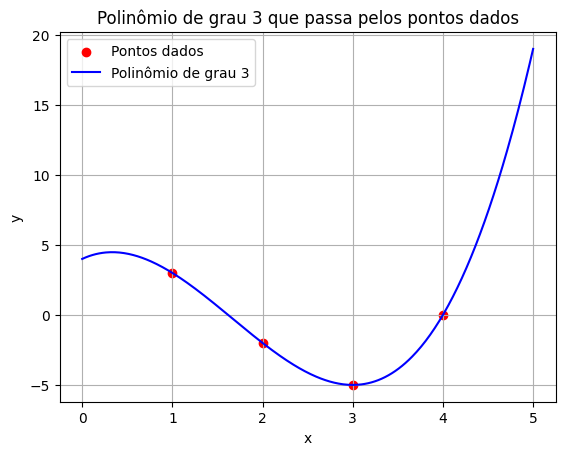

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([3, -2, -5, 0])

A = np.vstack([x**3, x**2, x, np.ones_like(x)]).T

coeff = np.linalg.solve(A, y)

a3, a2, a1, a0 = coeff

print(f"Coeficientes do polinômio: a3 = {a3}, a2 = {a2}, a1 = {a1}, a0 = {a0}")

def polynomial(x):
    return a3 * x**3 + a2 * x**2 + a1 * x + a0

plt.scatter(x, y, label='Pontos dados', color='red')

x_values = np.linspace(0, 5, 400)

y_values = polynomial(x_values)

plt.plot(x_values, y_values, label='Polinômio de grau 3', color='blue')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinômio de grau 3 que passa pelos pontos dados')

plt.grid(True)
plt.show()


**Questão 4:**

Em muitas aplicações é necessário encontrar uma função que representa um conjunto de dados obtidos experimentalmente. Podemos encontrar o polinômio de grau 3 que melhor representa um conjunto de 10 pontos $(x_i, y_i)$, $i=1,2,...,10$ resolvendo o sistema linear

$$(Z^TZ)a = Z^Ty$$

onde $Z$ é a matriz $10\times4$ obtida a partir dos valores de $x_i$, $i=1,2,...,10$ fazendo

$$Z = \left[\begin{matrix}
1 & x_1 & x_1^2 & x_1^3\\
1 & x_2 & x_2^2 & x_2^3\\
1 & x_3 & x_3^2 & x_3^3\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{10} & x_{10}^2 & x_{10}^3\\
\end{matrix}\right]$$

$a$ é a matriz dos coeficientes do polinômio $a=[a_0, a_1, a_2,a_3]^T$ e $y$ é dado por $y=[y_1,y_2,...,y_{10}]^T$.

Monte e resolva o sistema para encontrar o polinômio, então, plote o gráfico desse polinômio juntamente com os pontos: $(1.3,1.9)$, $(0.9,3.01)$, $(2.2,-2.1)$, $(1.95,-1.98)$, $(1.78,-1.53)$, $(3.1,-5.01)$, $(2.48,-4.91)$, $(2.74,-5.01)$, $(3.35,-4.02)$ e $(3.99,0.15)$

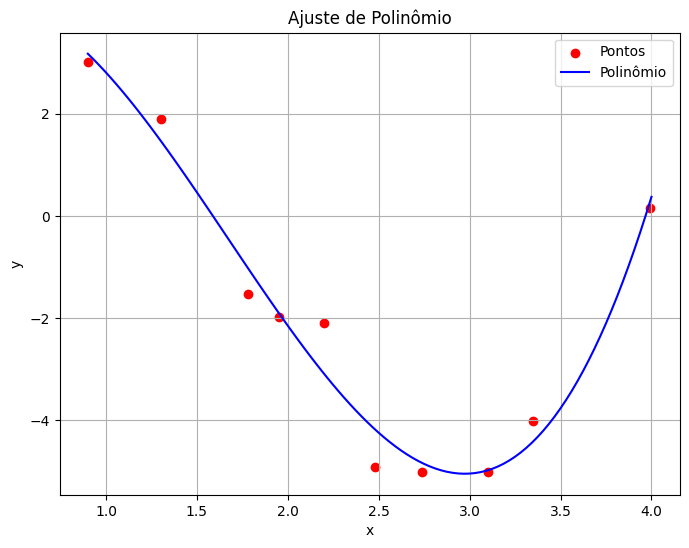

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([
    [1.3, 1.9],
    [0.9, 3.01],
    [2.2, -2.1],
    [1.95, -1.98],
    [1.78, -1.53],
    [3.1, -5.01],
    [2.48, -4.91],
    [2.74, -5.01],
    [3.35, -4.02],
    [3.99, 0.15]
])

Z = np.column_stack([np.ones(10), points[:, 0], points[:, 0]**2, points[:, 0]**3])

y = points[:, 1]

a = np.linalg.solve(Z.T @ Z, Z.T @ y)

def polynomial(x):
    return a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3

x_plot = np.linspace(0.9, 4.0, 100)
y_plot = polynomial(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], label='Pontos', color='red')
plt.plot(x_plot, y_plot, label='Polinômio', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Ajuste de Polinômio')
plt.show()


**Questão 5:**

A figura abaixo mostra o corte de uma aleta retangular (seção transversal constante) de comprimento $L = 0,3$ m e espessura $t = 0,01$ m, que está discretizada com $n + 1$ nós equidistantes ($\Delta x=L/n$). O coeficiente de transferência de calor por convecção $h$ é constante. A temperatura de um nó interno, $T_i$, está relacionada com as temperaturas dos nós adjacentes da seguinte maneira:

$$
T_{i-1}-\left\{2+(m \Delta x)^2\right\} T_i+T_{i+1}+(m \Delta x)^2 T_{\infty}=0
$$

em que $ m^2=\frac{h p}{k A_c}$ e $p$ é o perímetro da seção transversal $A_c$. A equação adequada para o nó $n+1$ é dada por:

$$
T_n-\left\{\frac{h \Delta x}{k}+1+\frac{1}{2}(m \Delta x)^2\right\} T_{n+1}+\left\{\frac{h \Delta x}{k}+\frac{1}{2}(m \Delta x)^2\right\} T_{\infty}=0
$$

Para uma situação de convecção natural circundando a aleta, use $h=5 \mathrm{~W} \mathrm{~m}^{-2} \mathrm{~K}^{-1}$. O material da aleta é o alumínio, portanto, apresentando	$k=100 \mathrm{~W} \mathrm{~m}^{-1} \mathrm{~K}^{-1}$. A temperatura da base é $T_b=373,15 \mathrm{~K}$ e a temperatura do ambiente circundante é	$T_{\infty}=298,15 \mathrm{~K}$. Utilizando $n = 10$, monte o sistema de equações lineares para as temperaturas ao longo da aleta e obtenha a solução usando um dos métodos estudados.
Apresente a resposta na forma de uma tabela e de um gráfico.

<img src="aleta.png" width="500">



Tabela de Temperaturas ao Longo da Aleta:
----------------------------------------
|   Posição (m)   |   Temperatura (K)   |
----------------------------------------
|     0.00         |     373.15      |
|     0.03         |     298.39      |
|     0.06         |     298.15      |
|     0.09         |     298.15      |
|     0.12         |     298.15      |
|     0.15         |     298.15      |
|     0.18         |     298.15      |
|     0.21         |     298.15      |
|     0.24         |     298.15      |
|     0.27         |     298.15      |
|     0.30         |     298.15      |
----------------------------------------


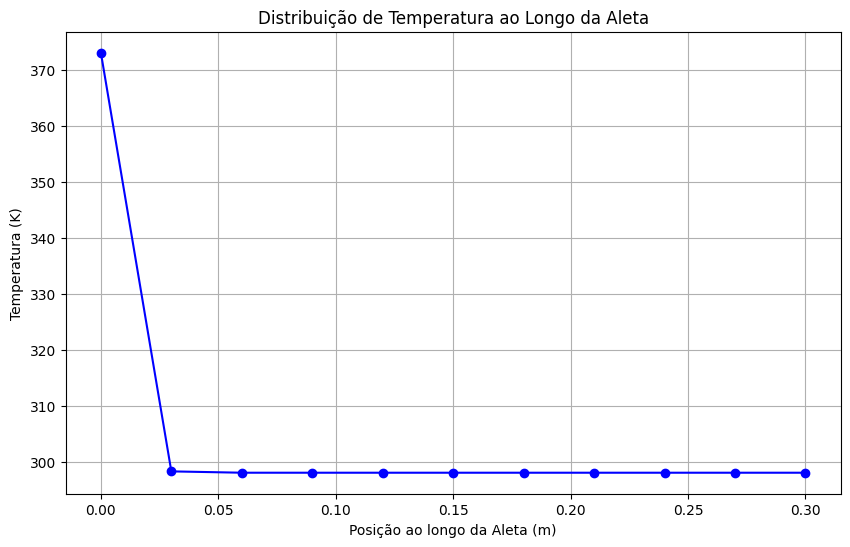

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do problema
L = 0.3  # Comprimento da aleta (m)
t = 0.01  # Espessura da aleta (m)
n = 10  # Número de nós
h = 5.0  # Coeficiente de transferência de calor por convecção (W/m^2*K)
k = 100.0  # Condutividade térmica do alumínio (W/m*K)
Tb = 373.15  # Temperatura da base (K)
T_infinity = 298.15  # Temperatura do ambiente circundante (K)

Ac = t * t
p = 2 * (L + t)
m_squared = (h * p) / (k * Ac)

A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

for i in range(1, n):
    A[i, i - 1] = 1.0
    A[i, i] = -(2 + m_squared)
    A[i, i + 1] = 1.0
    b[i] = -m_squared * T_infinity

A[0, 0] = 1.0
A[n, n] = 1.0
b[0] = Tb
b[n] = T_infinity

T = np.linalg.solve(A, b)

x = np.linspace(0, L, n + 1)
temperatures = T

print("Tabela de Temperaturas ao Longo da Aleta:")
print("----------------------------------------")
print("|   Posição (m)   |   Temperatura (K)   |")
print("----------------------------------------")
for i in range(n + 1):
    print(f"|     {x[i]:.2f}         |     {temperatures[i]:.2f}      |")
print("----------------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(x, temperatures, marker='o', linestyle='-', color='b')
plt.xlabel('Posição ao longo da Aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.grid(True)
plt.show()
